In [186]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression





pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

In [187]:
input_df = pd.read_csv("CML_Auto_MPG_v1.txt", sep="\t")

In [188]:
input_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2,vw pickup
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1,ford ranger


In [189]:
input_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.00,396.00,398.00,392.00,396.00,398.00,396.00,398.00
mean,23.51,5.46,193.43,104.47,2973.61,15.57,76.01,1.57
std,7.82,1.70,104.27,38.49,847.53,2.76,3.71,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,75.00,2225.25,13.83,73.00,1.00
50%,23.00,4.00,148.50,93.50,2811.00,15.50,76.00,1.00
75%,29.00,8.00,262.00,126.00,3610.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [190]:
pd.isnull(input_df).any()

mpg             False
cylinders        True
displacement    False
horsepower       True
weight           True
acceleration    False
year             True
origin          False
car             False
dtype: bool

<Axes: >

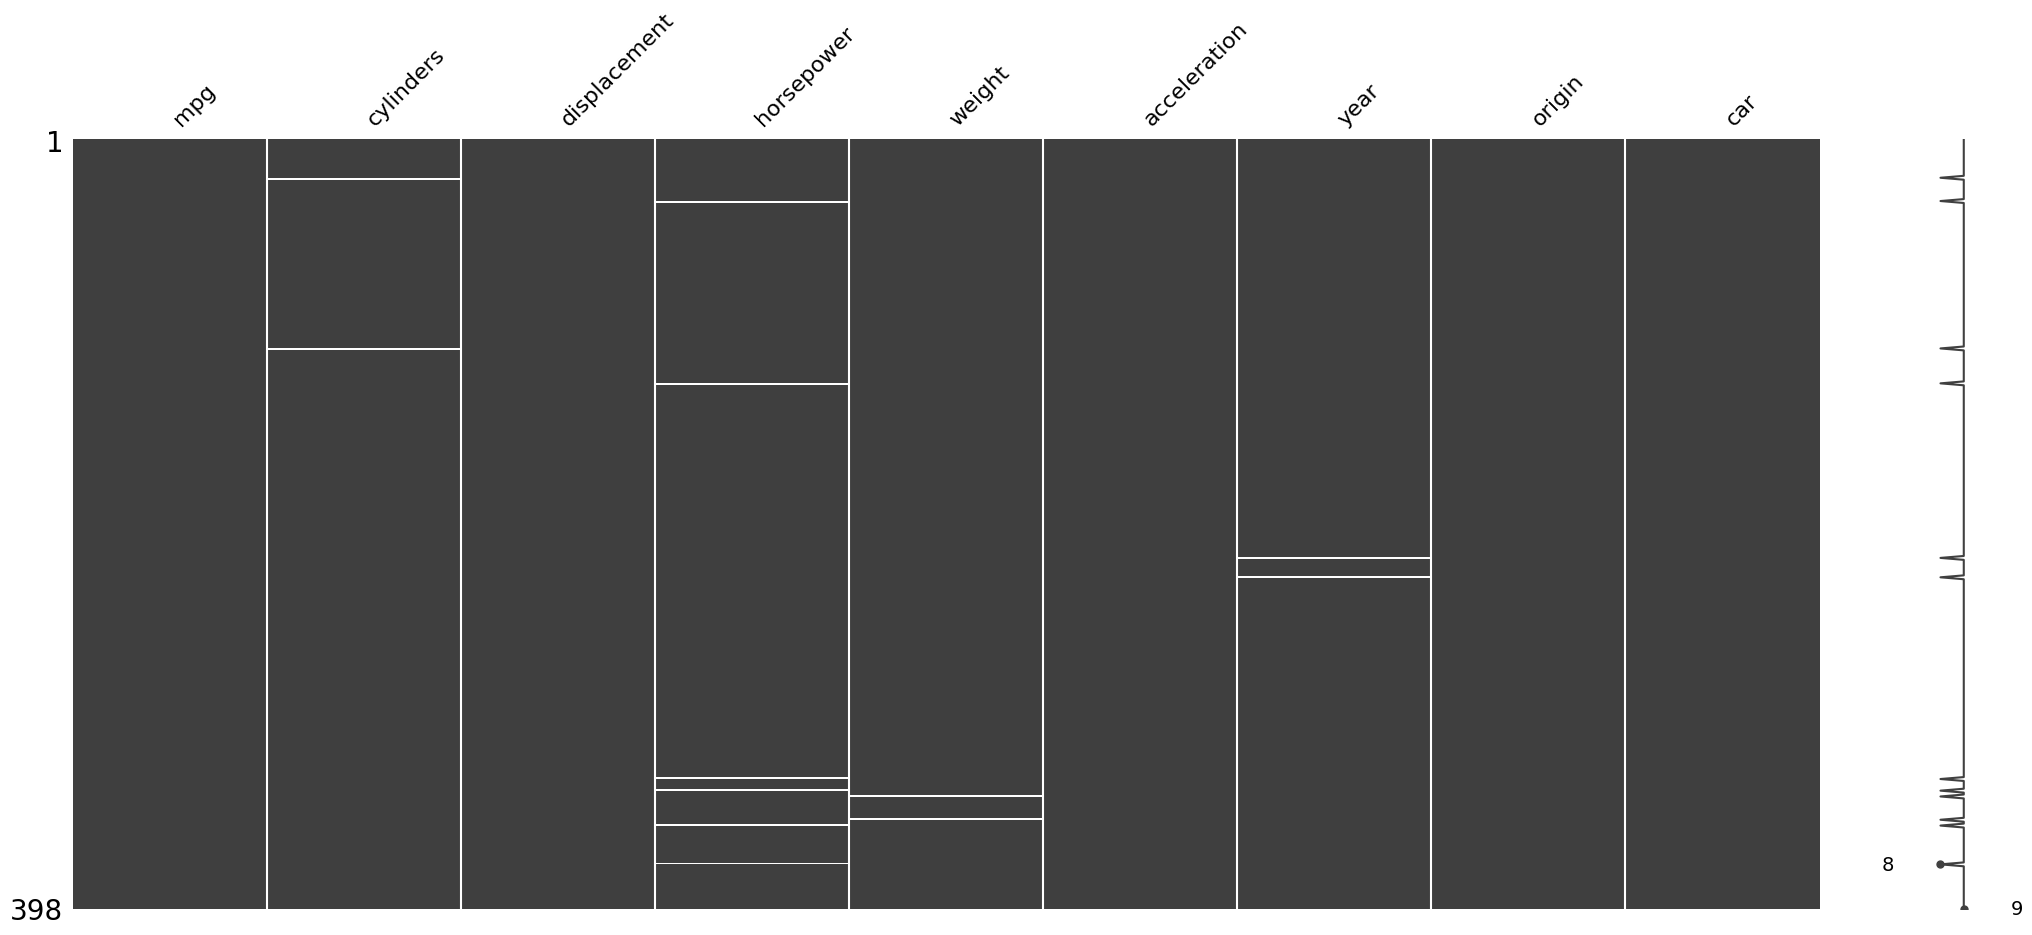

In [191]:
msno.matrix(input_df)

In [192]:
input_df = input_df.dropna()

<Axes: >

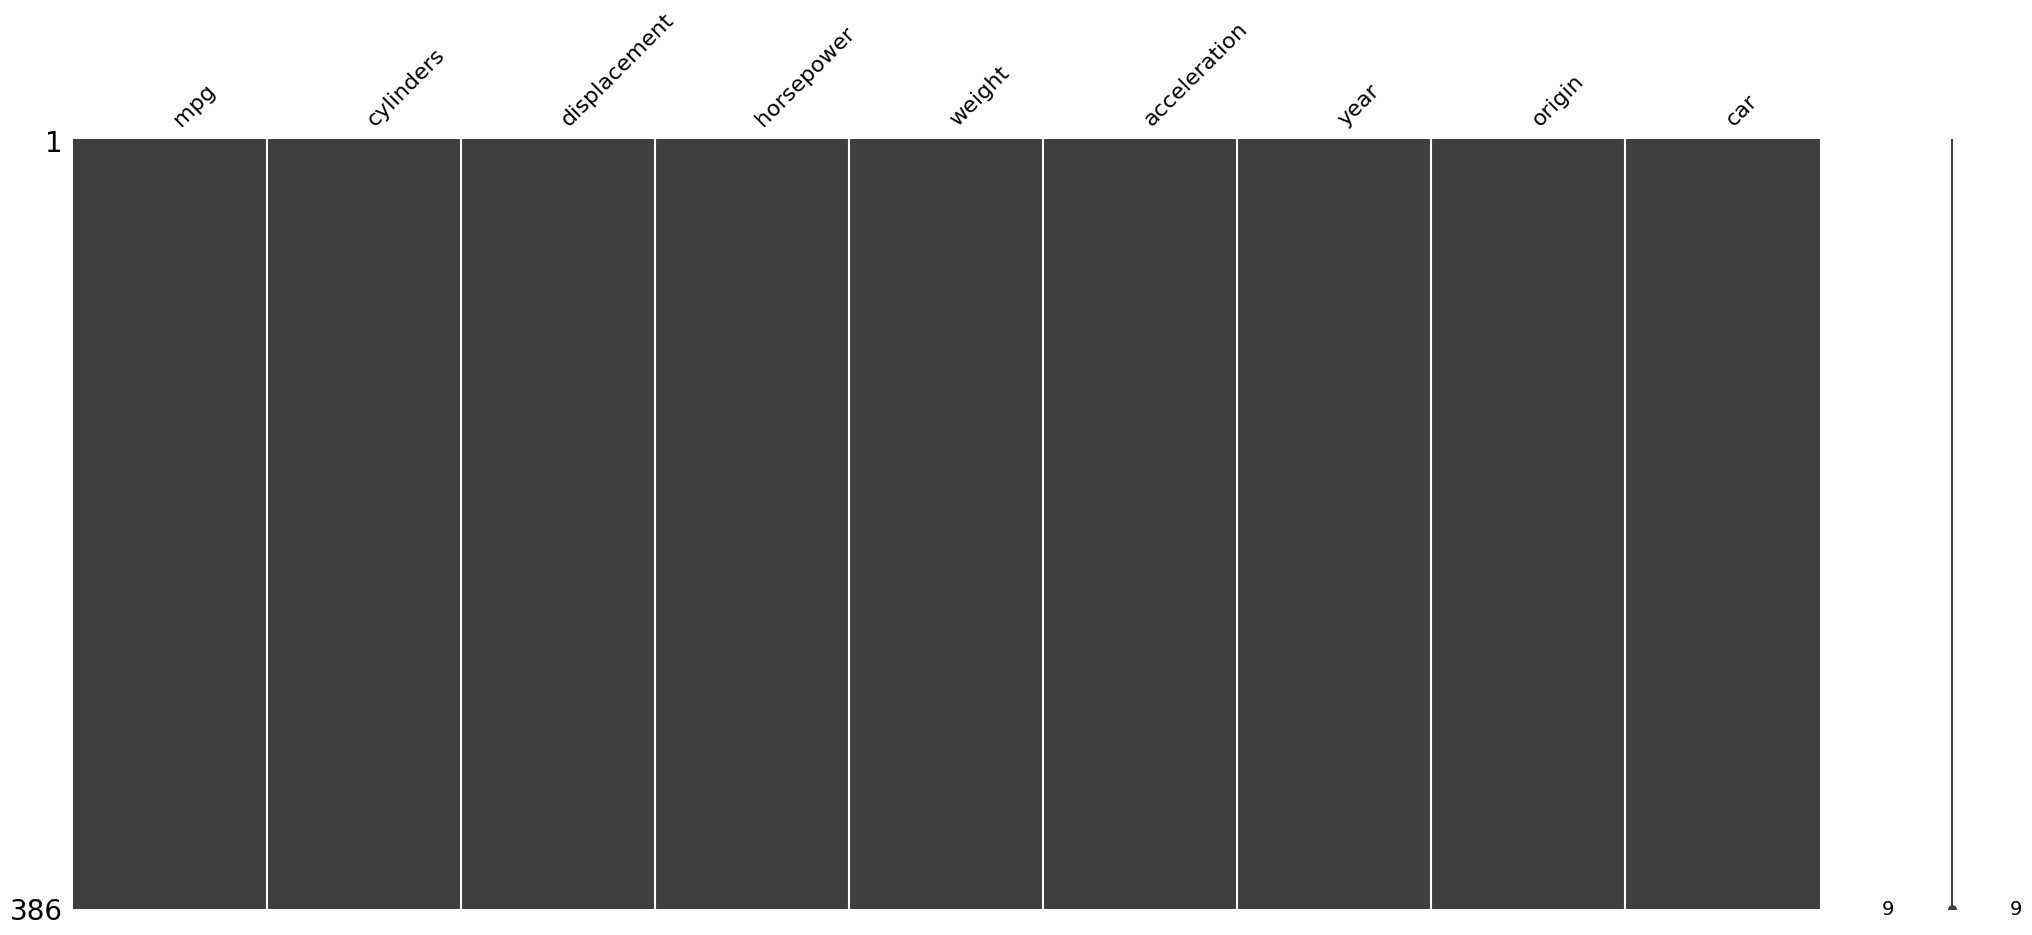

In [193]:
msno.matrix(input_df)

<Axes: >

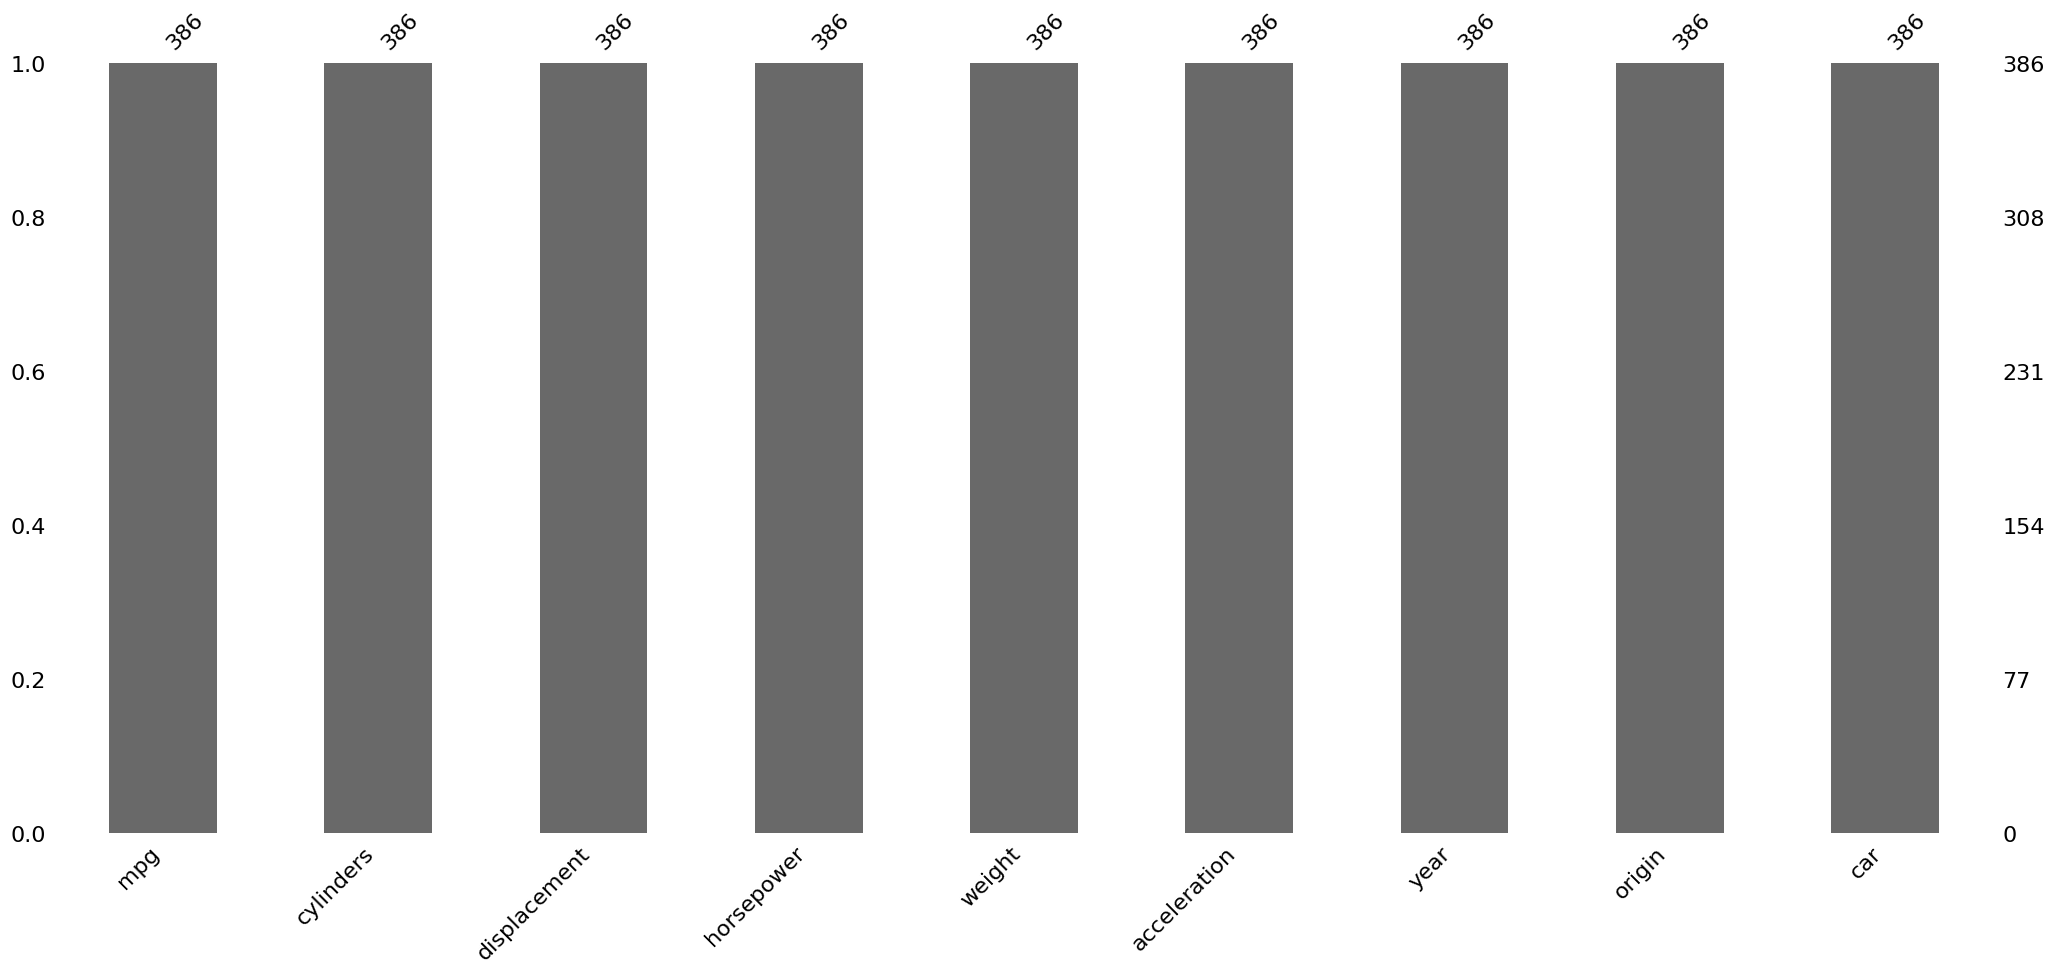

In [194]:
msno.bar(input_df)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

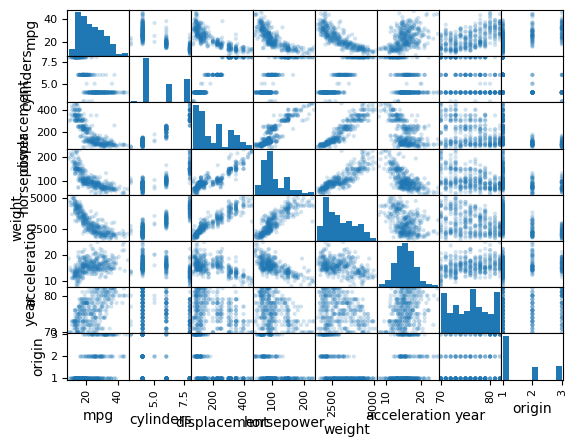

In [195]:
pd.plotting.scatter_matrix(input_df, alpha=0.2)

In [196]:
corr_df = input_df.select_dtypes(exclude="object").corr().abs()

<Axes: >

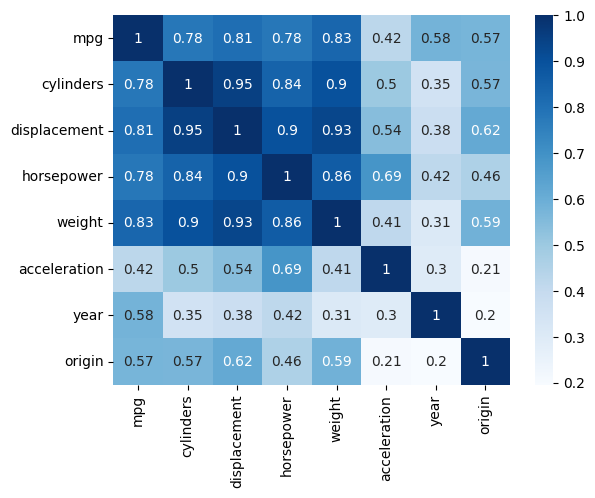

In [197]:
import seaborn as sns

sns.heatmap(corr_df, annot=True, cmap="Blues")


In [198]:
X = input_df[["acceleration", "weight", "horsepower", "displacement", "mpg"]].copy()

In [199]:
train, test = train_test_split(X, test_size=0.2)

In [200]:
test

,acceleration,weight,horsepower,displacement,mpg
7,8.5,4312.0,215.0,440.0,14.0
172,16.5,2223.0,71.0,90.0,25.0
44,12.0,5140.0,175.0,400.0,13.0
350,14.9,2215.0,63.0,105.0,34.7
212,12.1,4380.0,180.0,350.0,16.5
...,...,...,...,...,...
67,11.0,4633.0,208.0,429.0,11.0
9,8.5,3850.0,190.0,390.0,15.0
100,16.5,3021.0,88.0,250.0,18.0
320,15.0,2434.0,92.0,119.0,37.0


In [201]:
linearRegression = LinearRegression()

linearRegression.fit(train[["acceleration", "weight", "horsepower", "displacement"]], train["mpg"])

LinearRegression()

In [202]:
from sklearn.metrics import r2_score


y_train = linearRegression.predict(train[["acceleration", "weight", "horsepower", "displacement"]])
r2_train = r2_score(train["mpg"], y_train)
rmse_train = ((train["mpg"] - y_train) ** 2).mean() ** 0.5

y_pred = linearRegression.predict(test[["acceleration", "weight", "horsepower", "displacement"]])
r2_test = r2_score(test["mpg"], y_pred)
rmse_test = ((test["mpg"] - y_pred) ** 2).mean() ** 0.5



In [203]:
print(r2_train)
print(rmse_train)

0.7146712987116592
4.121205839651126


In [204]:
print(r2_test)
print(rmse_test)

0.6826413304798069
4.628918819788948


In [205]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(train[["acceleration", "weight", "horsepower", "displacement"]])
print(poly_features.get_feature_names_out(["acceleration", "weight", "horsepower", "displacement"]))

['1' 'acceleration' 'weight' 'horsepower' 'displacement' 'acceleration^2'
 'acceleration weight' 'acceleration horsepower'
 'acceleration displacement' 'weight^2' 'weight horsepower'
 'weight displacement' 'horsepower^2' 'horsepower displacement'
 'displacement^2']


In [206]:
X_train_poly

array([[1.0000e+00, 1.3500e+01, 4.5020e+03, ..., 2.4025e+04, 5.4250e+04,
        1.2250e+05],
       [1.0000e+00, 1.2500e+01, 2.2340e+03, ..., 1.2769e+04, 1.3673e+04,
        1.4641e+04],
       [1.0000e+00, 1.7300e+01, 2.8900e+03, ..., 7.7440e+03, 1.2320e+04,
        1.9600e+04],
       ...,
       [1.0000e+00, 1.6000e+01, 1.9850e+03, ..., 4.6240e+03, 6.1880e+03,
        8.2810e+03],
       [1.0000e+00, 1.3200e+01, 2.5560e+03, ..., 8.1000e+03, 1.3590e+04,
        2.2801e+04],
       [1.0000e+00, 1.6000e+01, 2.9140e+03, ..., 1.0000e+04, 2.3200e+04,
        5.3824e+04]])

In [207]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, train["mpg"])
print("Model coefficients: ", polynomial_model.coef_)
print("Model intercept: ", polynomial_model.intercept_)

Model coefficients:  [ 0.00000000e+00 -2.93439081e+00 -1.49113761e-04 -2.23425842e-01
 -1.53399431e-01  5.65590320e-02  1.20693035e-04  2.43160550e-03
  1.23119959e-03 -1.51326679e-06 -8.07105726e-06  3.08165238e-05
 -6.90490412e-04  1.23961456e-03 -2.80384385e-04]
Model intercept:  85.15215156699888


In [208]:
y_train_pred_poly = polynomial_model.predict(X_train_poly)
y_test_pred_poly = polynomial_model.predict(poly_features.transform(test[["acceleration", "weight", "horsepower", "displacement"]]))


In [209]:
r2_train_poly = r2_score(train["mpg"], y_train_pred_poly)
rmse_train_poly = ((train["mpg"] - y_train_pred_poly) ** 2).mean() ** 0.5

r2_test_poly = r2_score(test["mpg"], y_test_pred_poly)
rmse_test_poly = ((test["mpg"] - y_test_pred_poly) ** 2).mean() ** 0.5

print(r2_train_poly)
print(rmse_train_poly)

print(r2_test_poly)
print(rmse_test_poly)

0.7709290202354658
3.69263696950951
0.7478673222758314
4.125902387988952
